# Культурист-датасаентист

## Oглавление

* [Задача](#task)
* [Инструкция по выполнению проекта](#instructions)
* [Шаг 1. Загрузите данные](#1)
* [Шаг 2. Проведите исследовательский анализ данных (EDA)](#2)
* [Шаг 3. Постройте модель прогнозирования оттока пользователей](#3)
* [Шаг 4. Сделайте кластеризацию пользователей](#4)
* [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#5)




<a id="task"></a>
## Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

 1. выделить целевые группы клиентов;
 2. предложить меры по снижению оттока;
 3. определить другие особенности взаимодействия с клиентами.

<a id="instructions"></a>
## Инструкция по выполнению проекта

### [Шаг 1. Загрузите данные](#1)

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
* `Churn` — факт оттока в текущем месяце;
* Текущие поля в датасете:
 * Данные пользователя за предыдущий до проверки факта оттока месяц:
   * `gender` — пол
   * `Near_Location` — проживание или работа в районе, где находится фитнес-центр
   * `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
   * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
   * `Phone` — наличие контактного телефона
   * `Age` — возраст
   * `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
 * `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
 * `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
 * `Group_visits` — факт посещения групповых занятий
 * `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента
 * `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
 * `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
 
Путь к файлу: `/datasets/gym_churn.csv`


### [Шаг 2. Проведите исследовательский анализ данных (EDA)](#2)

* Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

### [Шаг 3. Постройте модель прогнозирования оттока пользователей](#3)

Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
* Разбейте данные на обучающую и валидационную выборку функцией `train_test_split()`.
* Обучите модель на train-выборке двумя способами:
 * логистической регрессией
 * случайным лесом
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Не забудьте указать параметр `random_state` при разделении выборки и задании алгоритма.

### [Шаг 4. Сделайте кластеризацию пользователей](#4)

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):
* Стандартизируйте данные.
* Постройте матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять `n=5`, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом `groupby()`). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

### [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#5)

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

<a id="1"></a>
### Шаг 1. Загрузите данные

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.core.display import display, HTML
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

register_matplotlib_converters()


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', -1)
sns.set_style("darkgrid")

In [2]:
# библиотека переиспользуемых самописных функций
def df_info(df):
    """вывод базовой инфы по датафрейму"""
    df.info()
    display(df.describe())
    display(df)

def show_html_tag(tag, text):
    """выводим text внутри тэга tag"""
    display(HTML('<' + tag + '>'+text+'</'+tag+'>'))

In [3]:
# делаем загрузку с разных путей в зависимости от того, где запущена тетрадка - локально или на сервере ЯП
root_local = 'datasets/' #путь к данным при локальном запуске
root_yp = '/datasets/' #путь к данным при запуске на сервере ЯП

username = ''
try:
    username = os.environ["USERNAME"]
except:
    pass

if(username == 'msn'): # локально
    root_path = root_local
else: # в тренажере
    root_path = root_yp

df = pd.read_csv(root_path + 'gym_churn.csv')

<a id="2"></a>
### Шаг 2. Проведите исследовательский анализ данных (EDA)

In [4]:
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0


#### Вывод
* На анализ представлен датасет из 4000 записей
* Пропусков значений нет, категориальных (кроме бинарных 0/1) признаков нет

In [5]:
show_html_tag('h4', 'Среднее значение признаков среди ушедших и оставшихся')
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


#### Вывод
* У ушедших и у оставшихся среднее значение части признаков никак или почти никак не отличаются - это относится к полу, возрасту, наличию телефона в анкете.
* Среднее значение некоторых других признаков отличается кардинально - например, средняя продолжительность контракта у ушедших в 3.3 раза меньше (5.75 vs 1.73), число месяцев до окончания контракта так же отличается более чем в 3 раза (5.28 vs 1,66), время с момента первого обращения отличается почти в 5 раз (4.71 vs 0.99)

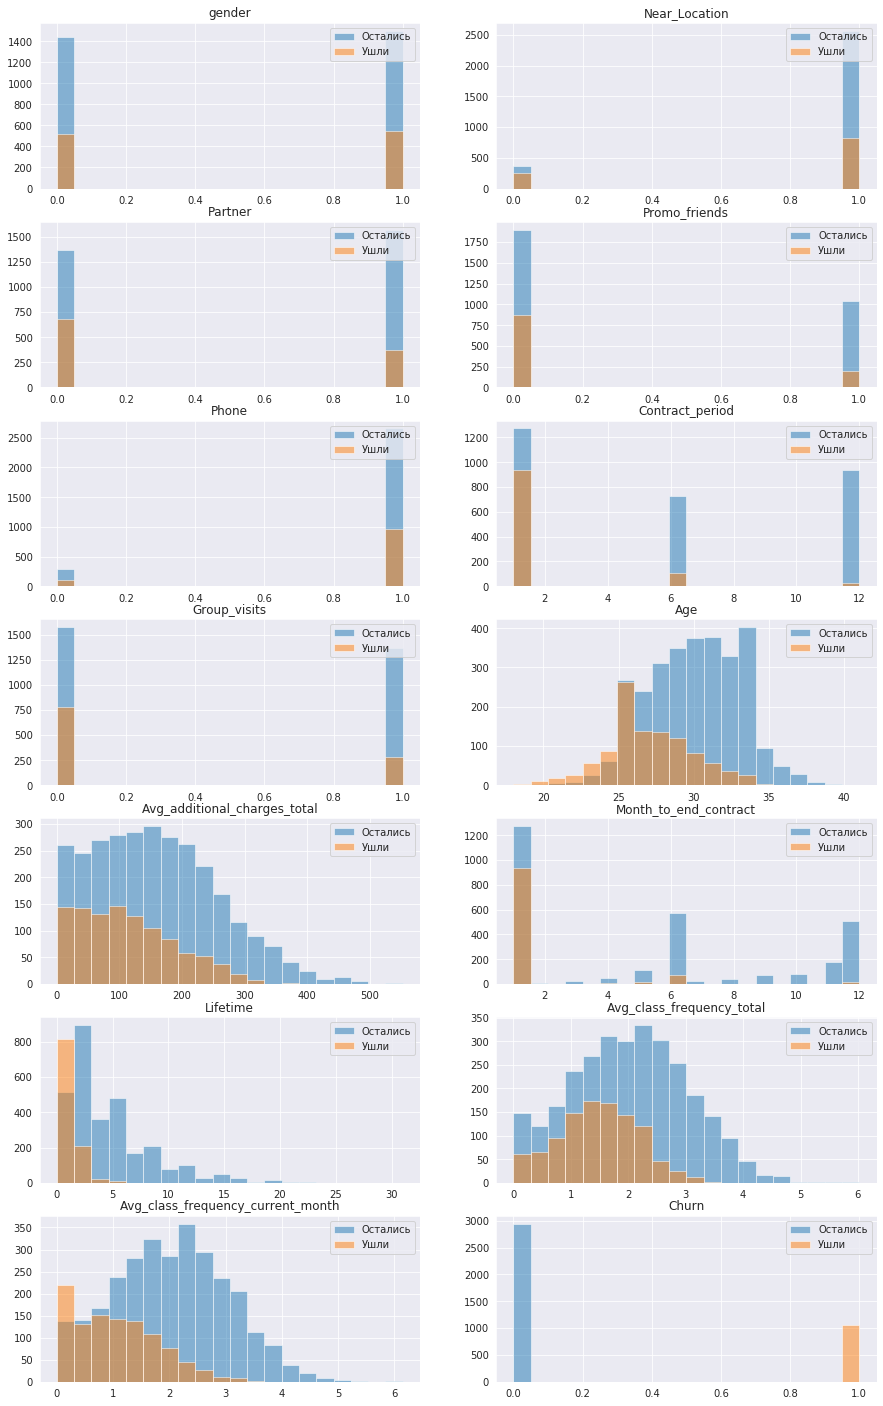

In [6]:
df_churn_1 = df.query('Churn==1')
df_churn_0 = df.query('Churn==0')

show_html_tag('h4', 'распределение признаков среди ушедших и оставшихся')
fig, ax = plt.subplots((len(df.columns)+1)//2, 2, figsize = (15,25)) # две колонки, а число строк вычисляем по числу признаков
ax = ax.ravel()
for i in range(len(df.columns)):
    col_name = df.columns[i]
    range_hist = (df[col_name].min(), df[col_name].max()) # фиксируем масштаб по оси X у гистаграммы
    ax[i].hist(df_churn_0[col_name], bins=20, range = range_hist, alpha=0.5, label='Остались')
    ax[i].hist(df_churn_1[col_name], bins=20, range = range_hist, alpha=0.5, label='Ушли')
    ax[i].legend(loc='upper right')
    ax[i].set_title(col_name)
plt.show()



#### Вывод
* Первый взгляд на график с распределением по возрасту может показать, что "молодые" кардинально чаще уходят, чем более возрастные. Но из-за того что основная масса посетителей сосредоточена в достаточно узком диапазоне 25-34 лет, получаем, что средний возраст в обеих группах отличается не сильно (см выводы предыдущего этапа)
* В принципе, на всех графиках виден сдвиг ушедших влево. Это говорит о том, что все метрики у ушедших меньше - лайфтайм, дополнительные начисления, частота посещений и т.д.

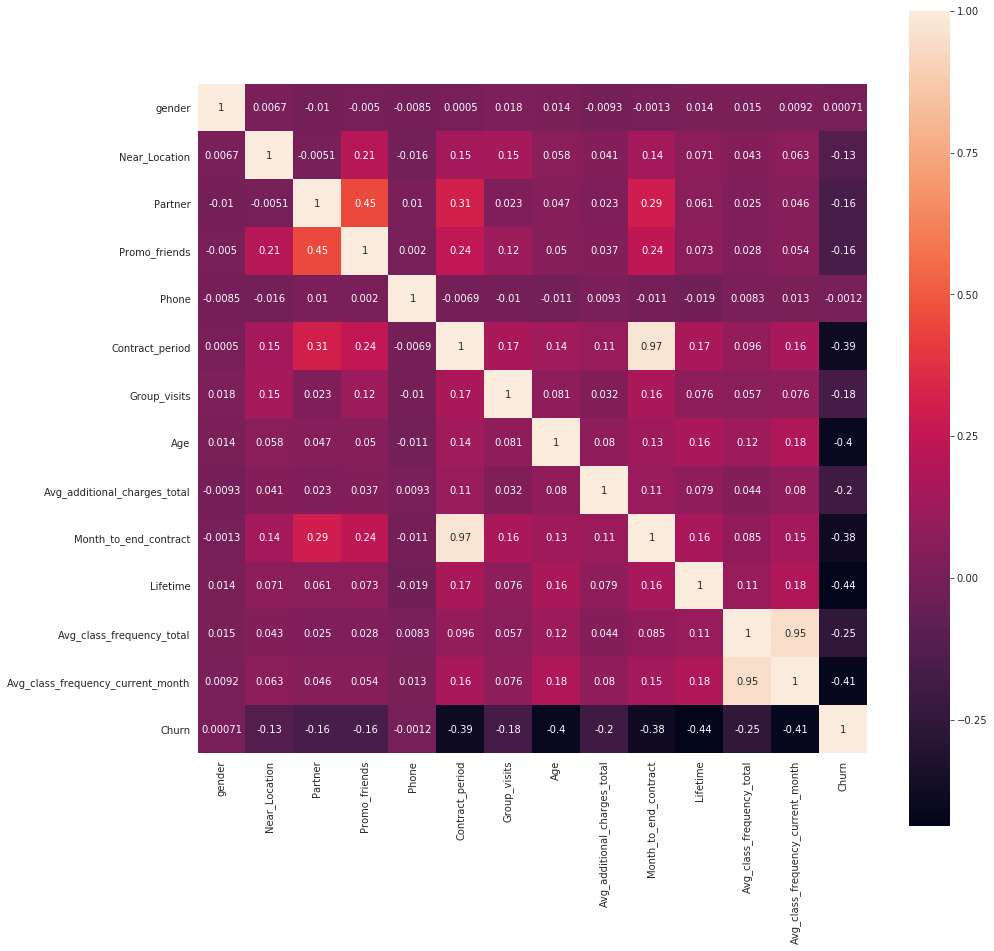

In [7]:
show_html_tag('h4', 'Матрица корреляции признаков')
cm = df.corr() 
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cm, annot = True, square=True, ax=ax)
plt.show()

#### Вывод
* Корреляция между всеми метриками достаточно мала - не более 0.35
* Редкие исключения: партнёр-промо (0.45), продолжительность контракта - срок до окончания контракта (0.97), средняя частота посещения за предыдущий месяц и весь период (0.95)
* Наблюдается небольшая корреляция (0.40+) оттока и метрик "возраст" (0.4), "лайфтайм" (0.44), "средняя частота посещений за последний месяц" (0.41)

### Вывод по этапу
* На анализ представлен датасет из 4000 записей
* Пропусков значений нет, категориальных (кроме бинарных 0/1) признаков нет
* У ушедших и у оставшихся среднее значение части признаков никак или почти никак не отличаются - это относится к полу, возрасту, наличию телефона в анкете.
* Среднее значение некоторых других признаков отличается кардинально - например, средняя продолжительность контракта у ушедших в 3.3 раза меньше (5.75 vs 1.73), число месяцев до окончания контракта так же отличается более чем в 3 раза (5.28 vs 1,66), время с момента первого обращения отличается почти в 5 раз (4.71 vs 0.99)
* Первый взгляд на график с распределением по возрасту может показать, что "молодые" кардинально чаще уходят, чем более возрастные. Но из-за того что основная масса посетителей сосредоточена в достаточно узком диапазоне 25-34 лет, получаем, что средний возраст в обеих группах отличается не сильно
* В принципе, на всех графиках виден сдвиг ушедших влево. Это говорит о том, что все метрики у ушедших меньше - лайфтайм, дополнительные начисления, частота посещений и т.д.
* Корреляция между всеми метриками достаточно мала - не более 0.35
* Редкие исключения: партнёр-промо (0.45), продолжительность контракта - срок до окончания контракта (0.97), средняя частота посещения за предыдущий месяц и весь период (0.95)
* Наблюдается небольшая корреляция (0.40+) оттока и метрик "возраст" (0.4), "лайфтайм" (0.44), "средняя частота посещений за последний месяц" (0.41)


<a id="3"></a>
### Шаг 3. Постройте модель прогнозирования оттока пользователей

In [8]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [9]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score (y_test, y_pred)
    
    print('\n')
    print(m)
    print('accuracy:{:.2f} precision:{:.2f} recall:{:.2f}'.format(acc, precision, recall))

In [10]:
models = [LogisticRegression(random_state = 0, solver = 'liblinear'), RandomForestClassifier(n_estimators = 100, random_state = 0)]
show_html_tag('h4', 'Прогноз с помощью двух моделей')
for m in models:
    make_prediction(m, X_train, y_train, X_test, y_test)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy:0.93 precision:0.89 recall:0.84


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
accuracy:0.92 precision:0.88 recall:0.83


### Вывод по этапу
* Предсказание с помощью логистической регрессии (accuracy:0.93 precision:0.89 recall:0.84) в данном случае оказывается чуть лучше, чем предсказание с помощью случайного леса (accuracy:0.92 precision:0.88 recall:0.83). Но отличие где-то на уровне погрешности.

<a id="4"></a>
### Шаг 4. Сделайте кластеризацию пользователей

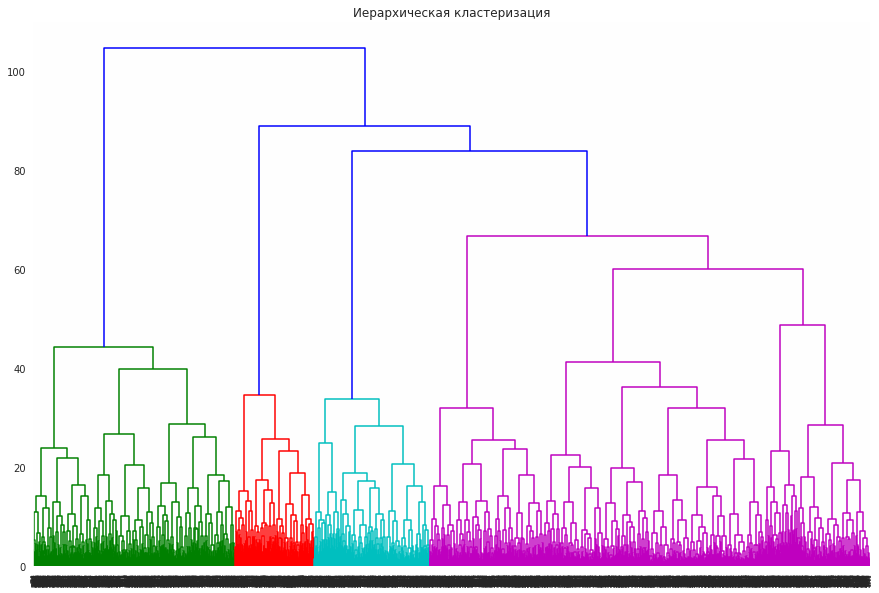

In [11]:
sc = StandardScaler()
df_sc = sc.fit_transform(df.drop(columns = ['Churn']))

linked = linkage(df_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

#### Вывод
* Видится логичным разбиение на 5-8 кластеров

In [12]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df.drop(columns = ['Churn']))
df['cluster_km'] = labels
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0,3
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0,3
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0,3
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1,3
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0,3


In [13]:
show_html_tag('h4', 'Среднее значение признаков в кластерах')
df.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.51,0.84,0.45,0.28,0.90,4.30,0.41,28.97,105.93,4.00,3.54,1.85,1.71,0.33
1,0.51,0.84,0.50,0.32,0.90,4.76,0.42,29.40,174.87,4.38,3.75,1.90,1.79,0.23
2,0.47,0.86,0.52,0.33,0.93,5.82,0.43,29.85,356.48,5.38,4.42,2.02,2.01,0.04
3,0.51,0.82,0.49,0.29,0.91,4.20,0.39,28.91,35.60,3.86,3.39,1.84,1.69,0.35
4,0.52,0.88,0.51,0.35,0.90,5.40,0.43,29.34,250.98,5.00,4.17,1.90,1.84,0.18


#### Вывод
* Большинство средних значений в кластерах отличается незначительно. Явные исключения дополнительная выручка (в кластерах 2 и 4 выше среднего, в 3 ниже)

In [14]:
def view_cluster_scatterplot():
    name_col = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 
                'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
    n_name = len(name_col) # число признаков
    n_graph = n_name*n_name # общее число графиков
    n_column = 3 # число солбцов в матрице графиков
    n_rows = (n_graph + n_column - 1) // n_column # число строк в матрице графиков

    fig, ax = plt.subplots(n_rows, n_column, figsize = (17,17*4))
    ax = ax.ravel()
    ax_i = 0
    show_html_tag('h4', 'Попарное распределение признаков по кластерам')
    for x in range(n_name):
        for y in range(n_name):
            sns.scatterplot(data = df, x = name_col[x], y=name_col[y], palette = 'Paired', 
                            hue = 'cluster_km', ax = ax[ax_i], legend = 'full')
            ax_i += 1
    plt.show()
#view_cluster_scatterplot()

In [15]:
def view_cluster_in_bar(data, col_feature, col_cluster, ax):
    sns.barplot(data = data, y=col_cluster, x=col_feature, ax=ax, orient = 'h', estimator=np.mean)
    ax.set(ylabel='кластер', xlabel = '')
    ax.set_title(col_feature)

def view_cluster_in_boxplot(data, col_feature, col_cluster, ax):
    sns.boxplot(y=col_cluster, x=col_feature, data=data, orient = 'h', ax=ax, width = 0.5)
    ax.set(ylabel='кластер', xlabel = '')    
    ax.set_title(col_feature)

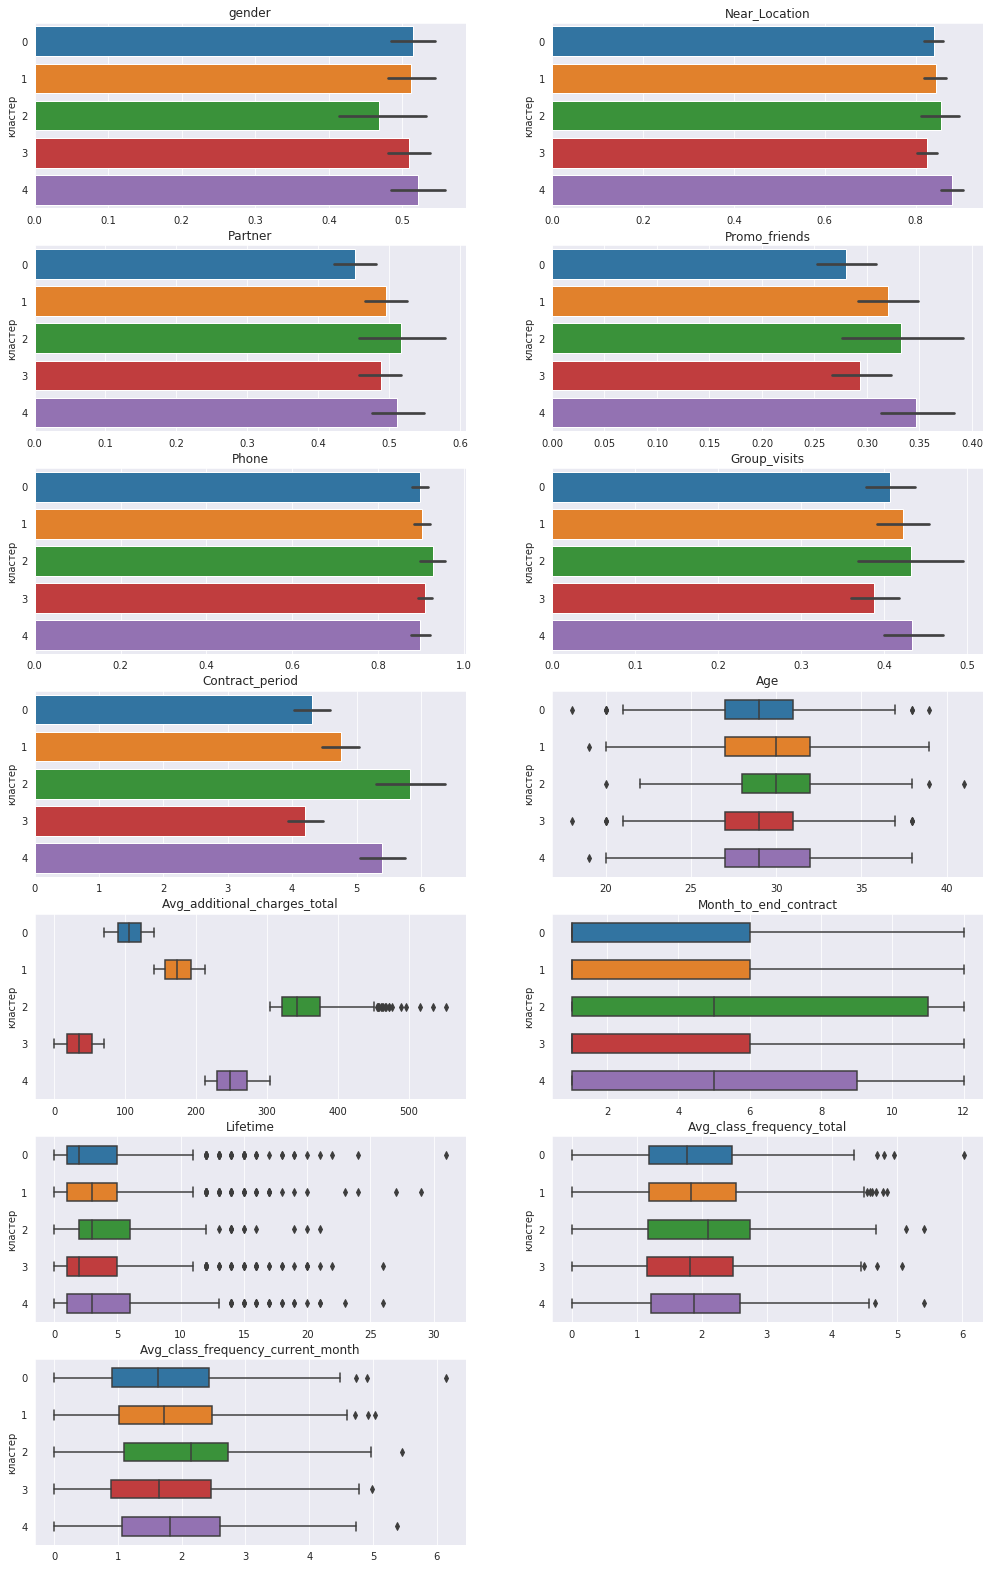

In [16]:
# блок добавлен после ревью #1
column_for_bar = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']
column_for_boxplot  = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                                           'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

n_graph = len(column_for_bar) + len(column_for_boxplot) # общее число графиков
n_column = 2   # число столбцов в сетке графиков
n_rows = (n_graph + n_column - 1) // n_column # число строк в матрице графиков

fig, ax = plt.subplots(n_rows, n_column, figsize = (17, 4*n_rows))
ax = ax.ravel()
ax_i = 0
for col in column_for_bar:
    view_cluster_in_bar(df, col, 'cluster_km', ax[ax_i])
    ax_i += 1
    
for col in column_for_boxplot:
    view_cluster_in_boxplot(df, col, 'cluster_km', ax[ax_i])
    ax_i += 1

n_null = n_column * n_rows - n_graph # число пустых ячеек в сетке, в которых не надо выводить график
for i in range(n_null): 
    ax[-(i+1)].set_visible(False) # отключаем вывод пустых ячеек

plt.show()

#### Вывод
* По половому признаку сильно выделяется кластер 2, остальные 4 примерно одинаковые.
* Доля сотрудников компаний-партнёров ниже всего в кластере 0
* Пришедших по акции "приведи друга" меньеш всего в кластерах 0 и 3
* По продолжительности контракта лидеры кластеры 2 и 4, аутсайдеры 0 и 3. Аналогичная же ситуация и по дополнительной выручке, только разница становится ещё более заметной.
* По лайфтайму, числу месяцев до окончания контракта  и средней частоте посещений (как за весь период, так и за последний месяц) ситуация так же похожа на предыдущий пункт за исключением того, что отстающие кластеры 0, 1 , 3 примерно эквивалентны по распределению.

In [17]:
show_html_tag('h4', 'Средний отток по кластерам')
df.groupby('cluster_km').agg(mean=('Churn', 'mean'), count=('Churn', 'count'))


,mean,count
cluster_km,,
0,0.33,1029
1,0.23,962
2,0.04,271
3,0.35,1032
4,0.18,706


#### Вывод
* Самый лучший в плане отсутствия оттока кластер №2 (отток 4%). Так же неплох кластер №4 (18%). Хуже всего себя ведут №0(33%) и №3(35%)

### Вывод по этапу
* Прикидка с помощью иерархической кластеризации подсказывает, что логично разбиение на 5-8 кластеров.
* По половому признаку сильно выделяется кластер 2, остальные 4 примерно одинаковые.
* По продолжительности контракта лидеры кластеры 2 и 4, аутсайдеры 0 и 3. Аналогичная же ситуация и по дополнительной выручке, только разница становится ещё более заметной.
* По лайфтайму, числу месяцев до окончания контракта и средней частоте посещений (как за весь период, так и за последний месяц) ситуация так же похожа на предыдущий пункт за исключением того, что отстающие кластеры 0, 1 , 3 примерно эквивалентны по распределению.

<a id="5"></a>
### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

### Общий вывод
* На представленном массиве данных методы предсказания оттока с помощью логистической регрессии и случайного леса работают практически одинаково эффективно (accuracy:0.93 precision:0.89 recall:0.84 vs accuracy:0.92 precision:0.88 recall:0.83)
* Отчётливо видна зависимость оттока от продолжительности контракта (чем больше продолжительность контракта, тем меньше шанс ухода), числа месяцев до окончания контракта (чем больше осталось до конца контракта - тем меньше вероятность ухода) и заметно, что новички более склонны к уходу, чем занимающиеся уже длительное кремя
* Соответственно, надо сконцентрировать маркетинговые активности на посетителях, обладающими одним из следующих признаков:
 * новички - необходимо им максимально раскрыть преимущества занятий, чтобы они не успели уйти, не осознав все прелести тренировок у нас
 * посетители с коротким контрактом - предлагаем им заключить более длительные договора со скидкой
 * посетители, у которых подходит срок окончания контракта - предлагаем им пролонгировать договора на льготных условиях
